In [95]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [96]:
gama=np.array([50,70,90,110,130]) #datos de rata
tao_experimental=np.array([6.01,7.48,8.59,9.19,10.21]) #datos de esfuerzo

In [97]:
(a,b)=sp.polyfit(gama,tao,1) #polyfit encuentra a y b tales que y=a*gama+b que mejor se ajusta a los datos
tao_ajuste=sp.polyval([a,b],gama) #polyval me evalùa, con los parámetros a y b, los valores de gama
error=np.sqrt(sum((tao_ajuste-tao_experimental)**2)/tao_ajuste.size) #saco el error cuadratico medio entre el valor real de tao y el obtenido con la curva

In [98]:
print('parameters: a=%.3f b=%.3f error=%.3f' %(a,b,error)) #impresión de parámetros obtenidos

parameters: a=0.051 b=3.747 error=0.210


In [99]:
t=np.linspace(gama[0],gama[-1]) #vector con datos de x (gama) para ser graficados

In [100]:
modelo=sp.polyval([a,b],t) # datos de y (tao modelo)

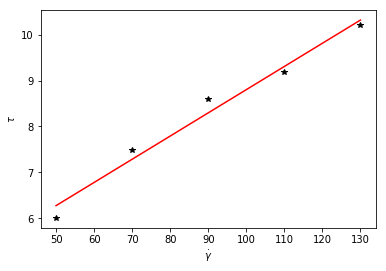

In [101]:
plt.plot(gama,tao_experimental,'*k')  #Graficación
plt.plot(t,modelo,'r')
plt.ylabel('$\\tau$')
plt.xlabel('$\dot{\gamma}$')
plt.show()

In [104]:
from scipy.optimize import curve_fit

In [105]:
def ecuacion(x,mu,n):  #definición de funcion que será introducida en curve fit
    return mu*x**n
    

In [129]:
popt,pcov=curve_fit(ecuacion,gama,tao_experimental) #popt son los valores optimos, pcov es la covarianza de estos 
error2=np.sqrt(sum(ecuacion(gama,*popt)-tao_experimental)**2/gama.size) # *popt toma todos los valores del arreglo popt

In [130]:
print('parámetros: mu=%.3f n=%.3f error=%.3f'%(popt[0],popt[1],error2))

parámetros: mu=0.776 n=0.530 error=0.003


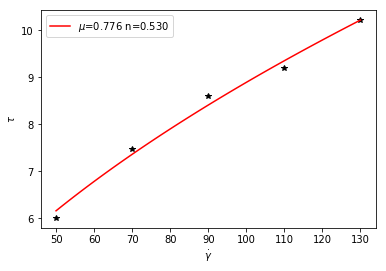

In [143]:
plt.plot(gama,tao_experimental,'*k')
plt.plot(t,ecuacion(t,*popt),'r',label='$\mu$=%.3f n=%.3f' %(popt[0],popt[1]))
plt.ylabel('$\\tau$')
plt.xlabel('$\dot{\gamma}$')
plt.legend()
plt.show()